# About This Project

The [Iris flower dataset or Fisher's Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a multivariate data set introduced by Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus". The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.




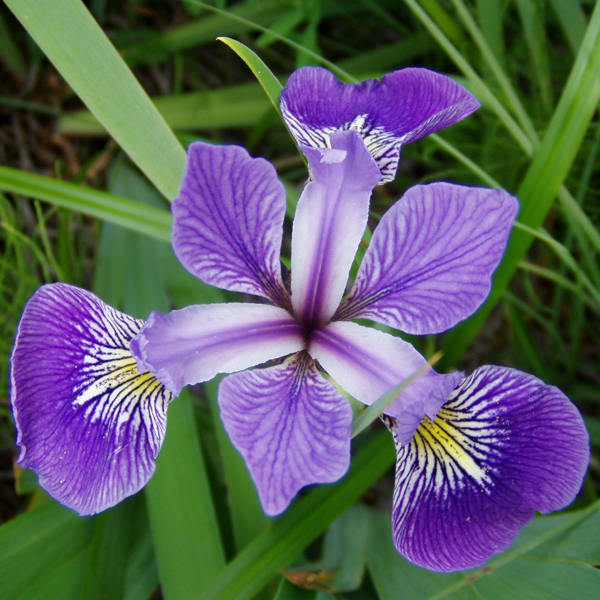

In [1]:
from IPython.display import display
from PIL import Image
path="C:/Users/harun/OneDrive/Documents/ML_Workshop_2021/Code and App/images/iris.jpg"
display(Image.open(path))

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn.externals 
import joblib

## Load The Data
I am going to use Iris flowers dataset. The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.



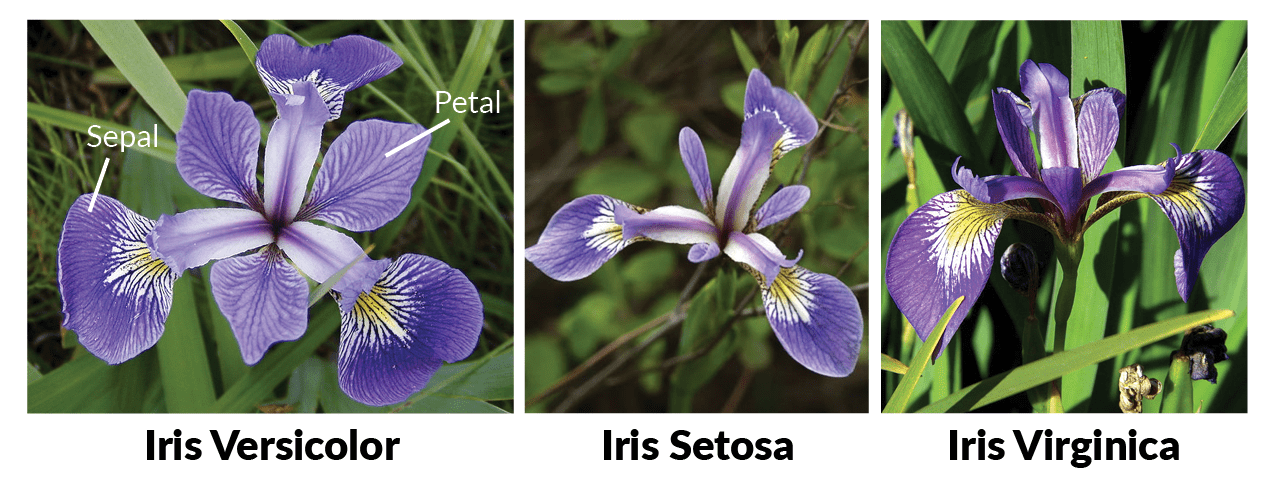

In [3]:
from IPython.display import display
from PIL import Image
path="C:/Users/harun/OneDrive/Documents/ML_Workshop_2021/Code and App/images/irisdataset.png"
display(Image.open(path))

In [4]:
# Loading dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

In [5]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing 

In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

## Exploratory Data Analysis(EDA)

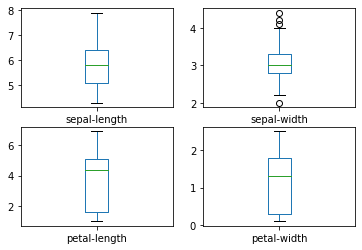

In [10]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

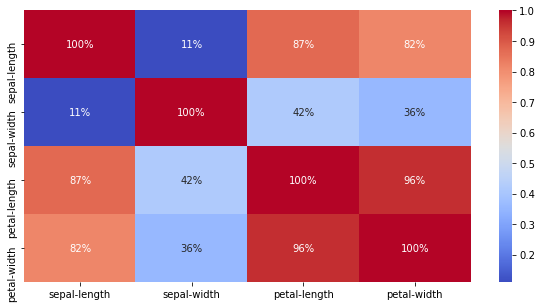

In [11]:
corr_matrix = df.corr().abs()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.0%')

## Splitting The Data into Training And Testing Dataset

In [12]:
array = df.values
X = array[:,0:4]    #1st 4 cols are training attributes
Y = array[:,4]      #5th col is the class (species name in our case)

In [13]:
validation_size = 0.20
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size)

## Build Machine Learning Models

### 1. Logistic Regression

**Logistic Regression** is one of the basic and popular algorithm to solve a classification problem. It is named as ‘Logistic Regression’, because it’s underlying technique is quite the same as Linear Regression. 

In [14]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [15]:
# we train the algorithm with training data and training output
logit.fit(X_train,Y_train)

LogisticRegression()

In [16]:
# we pass the testing data to the stored algorithm to predict the outcome
prediction = logit.predict(X_test)

In [17]:
# we check the accuracy of the algorithm
print('The accuracy of the Logistic Regression is: ', accuracy_score(prediction, Y_test))

The accuracy of the Logistic Regression is:  0.9333333333333333


### Save model

In [18]:
joblib.dump(logit, 'C:/Users/harun/OneDrive/Documents/ML_Workshop_2021/Code and App/real ai app/model/log_reg_model_iris.pkl')

['C:/Users/harun/OneDrive/Documents/ML_Workshop_2021/Code and App/real ai app/model/log_reg_model_iris.pkl']

### Testing

In [19]:
model = joblib.load(open('C:/Users/harun/OneDrive/Documents/ML_Workshop_2021/Code and App/real ai app/model/log_reg_model_iris.pkl','rb'))
inputs = np.array([6.5,3.2,5.1,2]).reshape(1,4)
output = model.predict(inputs)
print(output)

['Iris-virginica']


### 2. Decision Trees

**প্রশ্ন: কেন ট্রি এর মতো?**

ডেটা থেকে লার্ন করে প্রতিটি আলাদা ডিসিশানকে বিভিন্ন শাখা প্রশাখায় রিপ্রেজেন্ট করার জন্য ডিসিশান ট্রি তৈরি করা হয়। ট্রি এসেছে ইফ-এলসের সহজ কনসেপ্ট থেকে। 

**কিছু টার্ম:**

* নোড
* এজ
* রুট নোড/প্যারেন্ট
* চাইল্ড নোড
* ইন্টারনাল নোড
* লিফ নোড
* সাব ট্রি/ ব্রাঞ্চ

**প্রশ্ন: রুট কোনটি হবে?**

রুট বের করতে বেস্ট স্প্লিটিং এট্রিবিউট খুঁজতে হবে। এর মানে, যে এট্রিবিউট থেকে সহজে ক্লাসিফাই এর সিদ্ধান্ত নেওয়া যায়। মোট কথা, সবচে সহজে সিদ্ধান্ত নিতে পারে যে। 

**প্রশ্ন: কীভাবে রুট বের করা হয়?**

তিনটি উপায়। 

* জিনি ইন্ডেক্স/গিনি ইম্পিউরিটি
* কাই-স্কয়ার
* ইনফরমেশান গেইন

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
print("accuracy :" , dtree.score(X_test,Y_test))

accuracy : 0.9333333333333333


In [21]:
joblib.dump(dtree, 'C:/Users/harun/OneDrive/Documents/ML_Workshop_2021/Code and App/real ai app/model/decision_tree_model_iris.pkl')

['C:/Users/harun/OneDrive/Documents/ML_Workshop_2021/Code and App/real ai app/model/decision_tree_model_iris.pkl']

### Testing

In [22]:
model = joblib.load(open('C:/Users/harun/OneDrive/Documents/ML_Workshop_2021/Code and App/real ai app/model/decision_tree_model_iris.pkl','rb'))
inputs = np.array([6.5,3.2,5.1,2]).reshape(1,4)
output = model.predict(inputs)
print(output)

['Iris-virginica']
